### Setup / packages / crs

In [1]:
import geopandas as gp
from shapely import wkt
import pandas as pd
import pprint
import os
import glob
import openpyxl
import matplotlib.pyplot as plt
import plotly.express as px #if using plotly

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
worldmap = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
usa = gp.read_file("data/cb_2018_us_nation_5m.shp")
us_states = gp.read_file("data/cb_2018_us_state_500k.shp")
ca_state = gp.read_file("/Users/natebender/Desktop/repo/capstone_rmi/data/CA_State_TIGER2016.shp")
ca_counties = gp.read_file("/Users/natebender/Desktop/repo/capstone_rmi/data/CA_Counties_TIGER2016.shp")

In [4]:
# set common crs for project
projcrs = 4326
us_states = us_states.to_crs(projcrs)  # match us_states common crs for project
worldmap = worldmap.to_crs(projcrs)
ca_state = ca_state.to_crs(projcrs)
ca_counties = ca_counties.to_crs(projcrs)

In [5]:
# read in Refineries

cols = list(pd.read_csv("data/asset-climate-trace_oil-refining_091922.csv", nrows =1))
refs = pd.read_csv("data/asset-climate-trace_oil-refining_091922.csv", 
                   usecols = lambda x: x not in ['other1', 'other2', 'other3', 
                                                 'other4', 'other5', 'other6', 'other7'])
refs['location'] = gp.GeoSeries.from_wkt(refs['location'])  # convert existing points to geoseries
refs = gp.GeoDataFrame(refs, geometry="location", crs=projcrs,)  # convert df to geodf

In [6]:
all_files = glob.glob("data/*.xlsx")
print(all_files)  # check to make sure we're grabbing the right files 

['data/VIIRS_Global_flaring_d.7_slope_0.029353_2019_web_v20201114.xlsx', 'data/VIIRS_Global_flaring_d.7_slope_0.029353_2020_web_v1 (3).xlsx', 'data/VIIRS_Global_flaring_d.7_slope_0.029353_2021_web (2).xlsx', 'data/VIIRS_Global_flaring_d.7_slope_0.029353_2017_web_v1.xlsx', 'data/VIIRS_Global_flaring_d.7_slope_0.0298_2012-2016_web.xlsx', 'data/VIIRS_Global_flaring_d.7_slope_0.029353_2018_web.xlsx']


In [7]:
all_files = glob.glob("data/*.xlsx")

temp = []

for filename in all_files:
    flares_upstream = pd.read_excel(filename, index_col=None, header=0, sheet_name="flares_upstream")
    temp.append(flares_upstream)

flares_upstream = pd.concat(temp, axis=0, ignore_index=True)

# df.rename(columns={'old_col':'new_col', 'old_col_2':'new_col_2'}, inplace=True)
# some data cleanup
flares_upstream.rename(columns={'BCM 2019':'BCM_2019', 'Avg. temp':'avg_temp',
                   'BCM 2018':'BCM_2018', 'BCM 2020':'BCM_2020',
                   'BCM 2021':'BCM_2021',
                   'Detection frequency 2018':'Detection_frequency_2018',
                   'Detection frequency 2020':'Detection_frequency_2020',
                   'Detection frequency 2021':'Detection_frequency_2021',
                   'Clear obs 2018': 'Clear_obs_2018'}, inplace=True)



In [8]:
flares_upstream.head()

,Country,ISO Code,Catalog ID,id #,Latitude,Longitude,BCM_2019,avg_temp,Ellipticity,Detection_frequency_2019,Clear_obs_2019,Type,ID 2020,BCM_2020,"Avg. temp., K",Detection_frequency_2020,Clear_obs_2020,ID 2021,BCM_2021,Detection_frequency_2021,Clear_obs_2021,id_key_2017,Avg_Temp_K,Detection_frequency_2017,Clear_obs_2017,ISO_Code,BCM_2017,id_key,BCM_2012,BCM_2013,BCM_2014,BCM_2015,BCM_2016,Clear_obs_2012,Clear_obs_2013,Clear_obs_2014,Clear_obs_2015,Clear_obs_2016,Detection_frequency_2012,Detection_frequency_2013,Detection_frequency_2014,Detection_frequency_2015,Detection_frequency_2016,Catalog id,BCM_2018,Detection_frequency_2018,Clear_obs_2018
0,Venezuela,VEN,VEN_UPS_2015_63.6235W_9.6520N_v0.2,3591.0,9.652042,-63.623525,1.167234,1839.27,1.60150,100.0000,112.0,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iraq,IRQ,IRQ_UPS_2015_47.2834E_31.0259N_v0.2,6116.0,31.025901,47.283392,1.092002,1651.94,4.78228,83.5821,67.0,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iran,IRN,IRN_UPS_2015_49.7141E_28.4940N_v0.2,6450.0,28.494039,49.714096,0.947876,1658.76,2.31782,100.0000,265.0,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VEN,VEN_UPS_2015_63.5638W_9.6484N_v0.2,3617.0,9.648367,-63.563771,0.838633,1789.81,1.60150,100.0000,119.0,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iran,IRN,IRN_UPS_2015_48.1395E_31.0032N_v0.2,6253.0,31.003182,48.139510,0.787970,1660.03,1.84388,100.0000,95.0,upstream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(len(flares_upstream))

67811


In [10]:
# Read single excel file
# type of production: flaring, supply chain: upstream, year: 2021
# flare_up_21 = pd.read_excel("/Users/natebender/Desktop/repo/capstone_rmi/data/VIIRS_Global_flaring_d.7_slope_0.029353_2021_web (2).xlsx",
#              sheet_name="flare upstream")

In [11]:
# Convert to geopandas df and drop orig lat/long cols.

# Convert lat/long to points in geodataframe and set crs to common project crs
flares_upstream = gp.GeoDataFrame(
    flares_upstream, geometry=gp.points_from_xy(flares_upstream["Longitude"], 
                                            flares_upstream["Latitude"]), 
    crs = projcrs)

flares_upstream.drop(['Latitude', 'Longitude'], axis=1, inplace=True) 

/Users/natebender/opt/anaconda3/envs/capstonermi37/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


### Functions

In [12]:
def display_table(table_name, attribute_table):
    '''Display the first and last two rows of attribute table.'''

    # Print title
    print("Attribute Table: {}".format(table_name))

    # Print number of rows and columns
    print("\nTable shape (rows, columns): {}".format(attribute_table.shape))

    # Display first two rows of attribute table
    print("\nFirst two rows:")
    display(attribute_table.head(2))

    # Display last two rows of attribute table
    print("\nLast two rows:")
    display(attribute_table.tail(2))


def plot_overlay(overlay_type, overlay_result):
    '''Plot the overlay result on a map and add the outlines of the original shapefiles on top.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot overlay data
    overlay_result.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

    # Plot outlines of original shapefiles
    ca_counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
    #watersheds.plot(ax = ax, color = 'none', edgecolor = 'dodgerblue')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('San Francisco Bay Area County and Watershed Boundaries\n{}'.format(overlay_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})


In [13]:
print(worldmap.crs)
print(flares_upstream.crs)

epsg:4326
epsg:4326


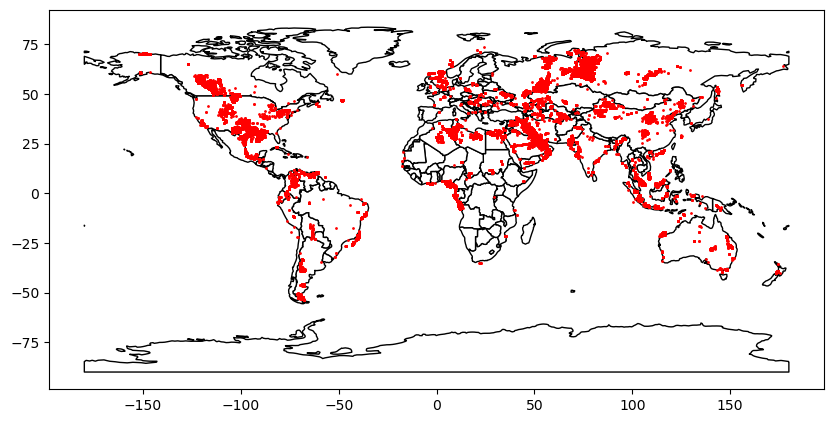

In [14]:
# Keeping worldmap in the orig crs of 4326 plots the points correctly

fig, ax = plt.subplots(figsize = (10,8))
worldmap.plot(ax = ax, color = 'white', edgecolor = 'black')
flares_upstream.plot(ax = ax, color='red', markersize=1)  # increase size for visibility
plt.show()

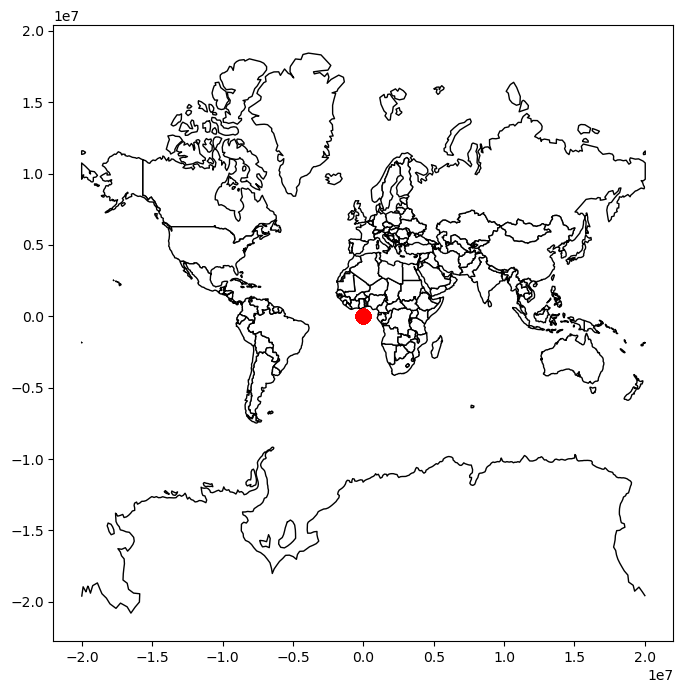

In [15]:
# putting the worldmap in the 3857 crs completely destroys the plotting. Don't know why yet.
# Perhaps it's something to do with the units, all the flares are plotted at 0,0 here.  
worldmap_new = worldmap.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize = (10,8))
worldmap_new.plot(ax = ax, color = 'white', edgecolor = 'black')
flares_upstream.plot(ax = ax, color='red', markersize=100)  # increase size for visibility
plt.show()

### Section 1

In [16]:
# subset to just lower 48 plus AK
# remove territories: PR, PW, VI, MH, GU
# and AK, HI
stateslist = ["AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","IA","ID", "IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY", "OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
us_states = us_states[us_states['STUSPS'].isin(stateslist)]
#us_states.sort_values(by=['NAME'], ascending=True)

In [17]:
#syntax: df.loc[df['col1'] == value]
#flare_up_21 = flare_up_21.loc[flare_up_21["ISO Code"] == "USA"]  # subset to just USA 

#us_flares = flare_up_21.loc[flare_up_21["ISO Code"] == "USA"]  # subset to just USA



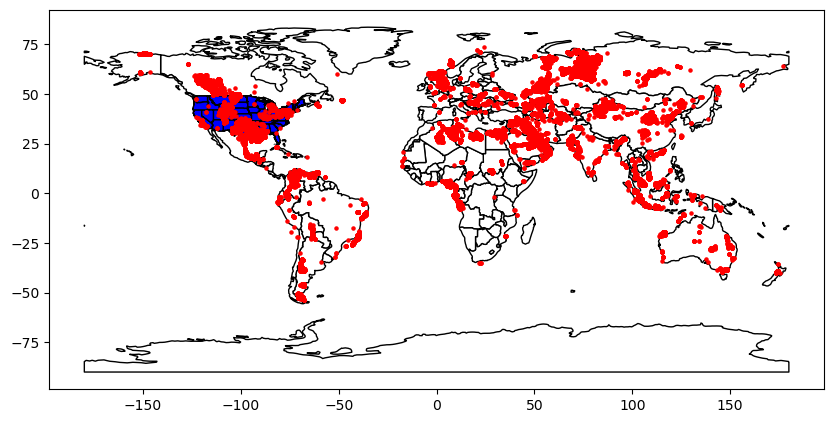

In [18]:
# # Plotting multiple layers
fig, ax = plt.subplots(figsize = (10,8))
worldmap.plot(ax = ax, color = 'white', edgecolor = 'black')
us_states.plot(ax = ax, color = 'blue', edgecolor = 'black')
flares_upstream.plot(ax = ax, color = 'red', markersize = 5)
plt.show()

In [19]:
# match dfs with just CA counties. only works if crs match

inner_join_result = gp.sjoin(flares_upstream, ca_counties, how = "inner", op = 'within')
refs_join = gp.sjoin(refs, ca_counties, how='inner', op='within')
print(f'Flares found: {len(inner_join_result)}')

Flares found: 101


In [20]:
# # match ds with US states

# inner_join_result = gp.sjoin(flares_upstream, us_states, how = "inner", op = 'within')
# refs_join = gp.sjoin(refs, us_states, how='inner', op='within')
#print(f'Flares found: {len(inner_join_result)}')

### Testing plots

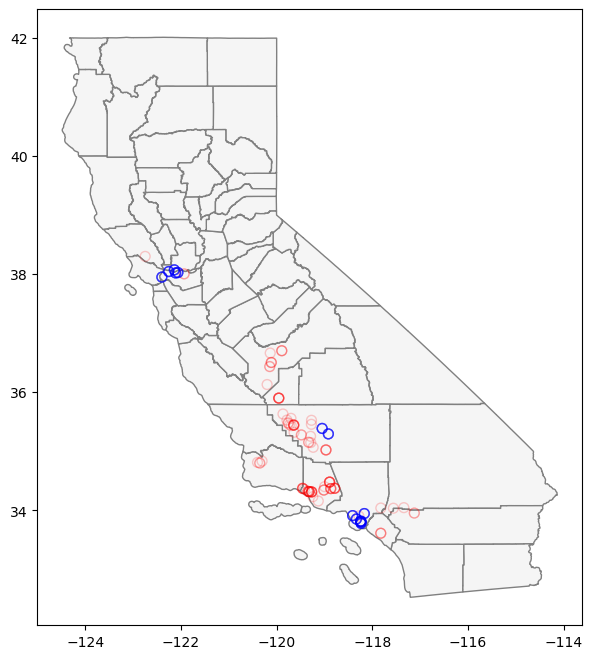

In [21]:
# # Plotting multiple layers
# save for ref: markersize=inner_join_result['BCM_2021']*10000

fig, ax = plt.subplots(figsize = (10,8))
#worldmap.plot(ax = ax, color = 'white', edgecolor = 'black')
#us_states.plot(ax = ax, color = 'whitesmoke', edgecolor = 'black')
ca_counties.plot(ax = ax, color = 'whitesmoke', edgecolor = 'grey')
inner_join_result.plot(ax = ax, facecolors='none', color = 'red', alpha=.2, markersize=50)
refs_join.plot(ax=ax, facecolors='none', color='blue', alpha=.2, markersize=50)
#plt.ylim([33, 39])  # can zoom for readability
plt.show()

## CA counties: upstream flare volume by year

In [266]:
ca_flares = gp.sjoin(flares_upstream, ca_counties, how = "inner", op = 'within')
# rename so county names col is clear
ca_flares.rename(columns={'NAME':'county_name'}, inplace=True)

In [267]:
# # could use this syntax to create table of several calcs, like count, sum, mean, etc. 

# stats = ca_flares.groupby(['county_name']).agg({'BCM_2012': ['count', 'sum'],
#                                         'BCM_2013': ['count', 'sum'],
#                                         'BCM_2014': ['count', 'sum'],
#                                         'BCM_2015': ['count', 'sum'],
#                                         'BCM_2016': ['count', 'sum'],
#                                         'BCM_2017': ['count', 'sum'],
#                                         'BCM_2018': ['count', 'sum'],
#                                         'BCM_2019': ['count', 'sum'],
#                                         'BCM_2020': ['count', 'sum'],
#                                         'BCM_2021': ['count', 'sum']})

In [268]:
# Create df of total BCM by year, grouped by CA county

col_list = ['BCM_2012','BCM_2013','BCM_2014','BCM_2015','BCM_2016','BCM_2017',
            'BCM_2018','BCM_2019','BCM_2020','BCM_2021']

stats = ca_flares.groupby(['county_name'])[col_list].sum()
stats['Total_bcm'] = stats.loc[:,col_list].sum(axis=1)

In [269]:
stats.sort_values('Total_bcm', ascending=False)

,BCM_2012,BCM_2013,BCM_2014,BCM_2015,BCM_2016,BCM_2017,BCM_2018,BCM_2019,BCM_2020,BCM_2021,Total_bcm
county_name,,,,,,,,,,,
Ventura,0.012710,0.010459,0.014991,0.014626,0.010991,0.007965,0.013832,0.012244,0.010266,0.007006,0.115091
Kern,0.022107,0.017479,0.006143,0.004658,0.004097,0.001750,0.001857,0.001513,0.001847,0.002424,0.063874
Contra Costa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009519,0.007903,0.017422
Orange,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013800,0.002061,0.015861
Kings,0.000113,0.000184,0.000466,0.002189,0.001324,0.000832,0.001163,0.000762,0.000651,0.000527,0.008210
Fresno,0.000000,0.000000,0.000000,0.000000,0.002157,0.000000,0.000126,0.000627,0.001563,0.002572,0.007045
Riverside,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001856,0.000000,0.000000,0.002968,0.004824
Santa Barbara,0.000279,0.000206,0.000099,0.000000,0.000000,0.000304,0.001694,0.000000,0.000000,0.000000,0.002583
Los Angeles,0.000000,0.000000,0.000000,0.000000,0.001119,0.000000,0.000000,0.000000,0.000000,0.000000,0.001119


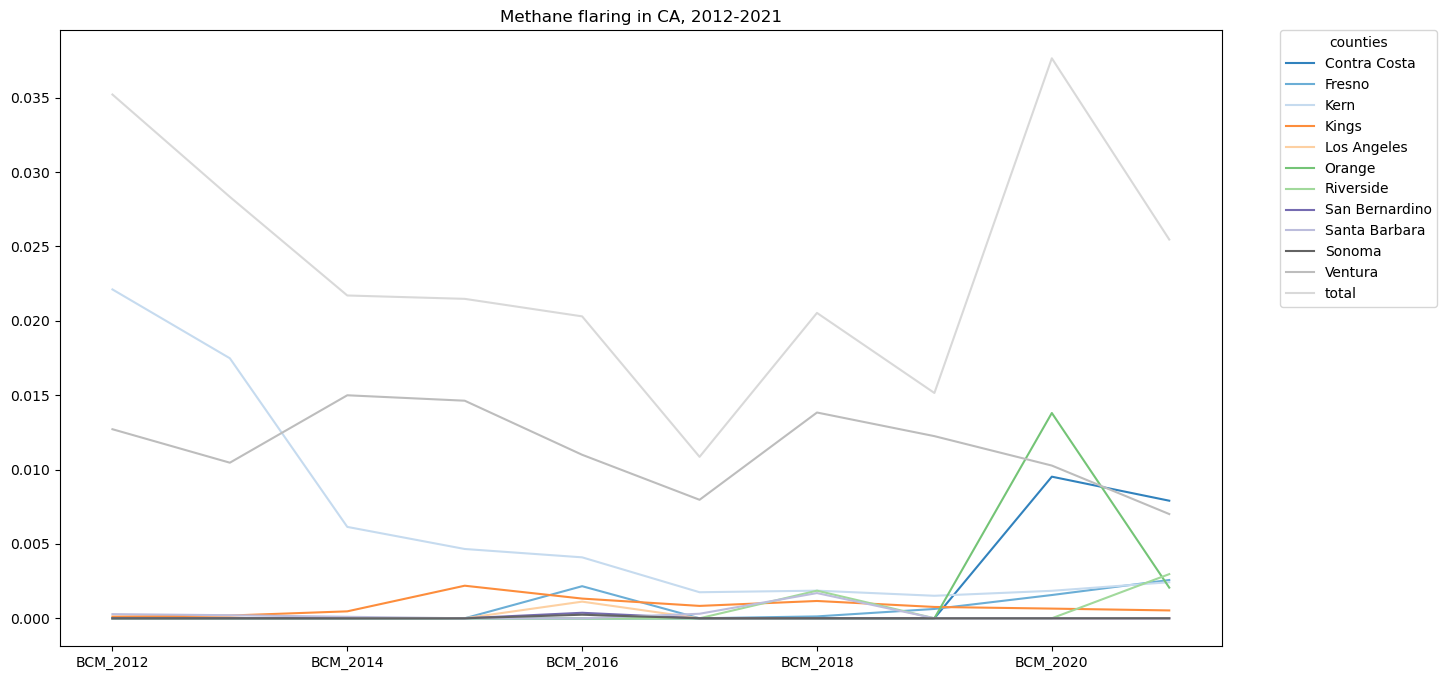

In [270]:
forplot = stats.drop(['Total_bcm'], axis=1)
forplot.loc['total'] = forplot.sum()
forplot = forplot.transpose() # or df1.transpose()

plot = forplot.plot(kind = 'line', title = 'Methane flaring in CA, 2012-2021', colormap='tab20c', figsize = [15, 8])
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='counties')